# TEST Notebook

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
gdf = gpd.read_file('../data/communes-20220101-shp/')
gdf.head()

,insee,nom,wikipedia,surf_ha,geometry
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.38510, ..."
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.20010 42.39013, 9.20014 42.39014, ..."
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ..."
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.25119 42.37605, 9.25132 42.37603, ..."
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.28340 42.66273, 9.28345 42.66273, ..."


In [9]:
folder_path = "../data/cog_ensemble_2021_csv/"
df_commune = pd.read_csv(folder_path + "commune2021.csv")
df_commune.head()

,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
0,COM,01001,84.0,01,01D,012,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,0108,NaN
1,COM,01002,84.0,01,01D,011,5,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,0101,NaN
2,COM,01004,84.0,01,01D,011,1,AMBERIEU EN BUGEY,Ambérieu-en-Bugey,Ambérieu-en-Bugey,0101,NaN
3,COM,01005,84.0,01,01D,012,1,AMBERIEUX EN DOMBES,Ambérieux-en-Dombes,Ambérieux-en-Dombes,0122,NaN
4,COM,01006,84.0,01,01D,011,1,AMBLEON,Ambléon,Ambléon,0104,NaN


In [11]:
# Assuming you have already read the shape file into a GeoDataFrame called 'gdf' and the CSV into a DataFrame called 'df_commune'

# Convert the 'insee' and 'COM' columns to strings if they are not already
gdf['insee'] = gdf['insee'].astype(str)
df_commune['COM'] = df_commune['COM'].astype(str)

# Merge the GeoDataFrame with the DataFrame on the 'insee' and 'COM' columns
merged_gdf = gdf.merge(df_commune, left_on='insee', right_on='COM')

# The 'DEP' column from df_commune will now be in the merged_gdf, giving you the department for each commune
merged_gdf.head()

,insee,nom,wikipedia,surf_ha,geometry,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
0,2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((9.32017 42.38507, 9.32028 42.38510, ...",COM,2B222,94.0,2B,20R,2B3,0,PIE D OREZZA,Pie-d'Orezza,Pie-d'Orezza,2B10,NaN
1,2B137,Lano,fr:Lano,824.0,"POLYGON ((9.20010 42.39013, 9.20014 42.39014, ...",COM,2B137,94.0,2B,20R,2B3,0,LANO,Lano,Lano,2B14,NaN
2,2B051,Cambia,fr:Cambia,833.0,"POLYGON ((9.27757 42.37509, 9.27758 42.37512, ...",COM,2B051,94.0,2B,20R,2B3,0,CAMBIA,Cambia,Cambia,2B14,NaN
3,2B106,Érone,fr:Érone,393.0,"POLYGON ((9.25119 42.37605, 9.25132 42.37603, ...",COM,2B106,94.0,2B,20R,2B3,1,ERONE,Érone,Érone,2B14,NaN
4,2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((9.28340 42.66273, 9.28345 42.66273, ...",COM,2B185,94.0,2B,20R,2B5,1,OLETTA,Oletta,Oletta,2B05,NaN


In [18]:
condition = (merged_gdf['DEP'] == '27') | (merged_gdf['DEP'] == '28')
merged_gdf[condition]


,insee,nom,wikipedia,surf_ha,geometry,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
15793,27146,La Chapelle-Bayvel,fr:La Chapelle-Bayvel,481.0,"POLYGON ((0.38652 49.25930, 0.38676 49.25959, ...",COM,27146,28.0,27,27D,272,3,CHAPELLE BAYVEL,Chapelle-Bayvel,La Chapelle-Bayvel,2703,NaN
15794,27071,Le Bois-Hellain,fr:Le Bois-Hellain,320.0,"POLYGON ((0.38054 49.28083, 0.38080 49.28203, ...",COM,27071,28.0,27,27D,272,2,BOIS HELLAIN,Bois-Hellain,Le Bois-Hellain,2703,NaN
15796,27021,Asnières,fr:Asnières (Eure),828.0,"POLYGON ((0.38281 49.21603, 0.38299 49.21607, ...",COM,27021,28.0,27,27D,272,1,ASNIERES,Asnières,Asnières,2703,NaN
15797,27170,Cormeilles,fr:Cormeilles (Eure),308.0,"POLYGON ((0.36890 49.24405, 0.37074 49.24570, ...",COM,27170,28.0,27,27D,272,0,CORMEILLES,Cormeilles,Cormeilles,2703,NaN
15798,27100,Boulleville,fr:Boulleville,717.0,"POLYGON ((0.37254 49.35384, 0.37256 49.35396, ...",COM,27100,28.0,27,27D,272,0,BOULLEVILLE,Boulleville,Boulleville,2703,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34972,27311,Harcourt,fr:Harcourt,1530.0,"POLYGON ((0.72697 49.18575, 0.72746 49.18608, ...",COM,27311,28.0,27,27D,272,1,HARCOURT,Harcourt,Harcourt,2707,NaN
34974,27444,Le Noyer-en-Ouche,fr:Le Noyer-en-Ouche,1099.0,"POLYGON ((0.71963 49.00957, 0.72308 49.01336, ...",COM,27444,28.0,27,27D,272,2,NOYER EN OUCHE,Noyer-en-Ouche,Le Noyer-en-Ouche,2702,NaN
34975,27102,Bouquetot,fr:Bouquetot,1310.0,"POLYGON ((0.73451 49.34513, 0.73477 49.34894, ...",COM,27102,28.0,27,27D,272,0,BOUQUETOT,Bouquetot,Bouquetot,2704,NaN
34976,27089,Thénouville,fr:Thénouville,1331.0,"POLYGON ((0.73820 49.30214, 0.73847 49.30300, ...",COM,27089,28.0,27,27D,272,0,THENOUVILLE,Thénouville,Thénouville,2705,NaN


/Users/francoismoreau/anaconda3/envs/geo_data/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


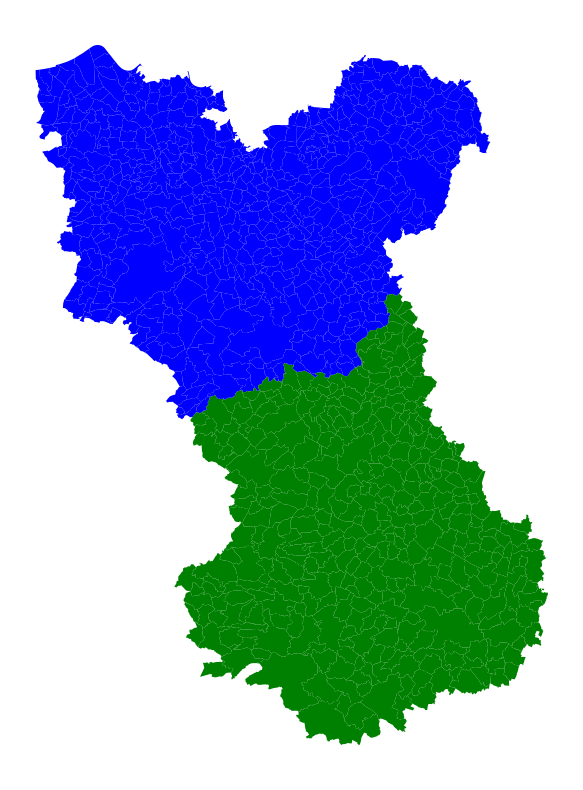

In [20]:
# Assuming 'merged_gdf' is your merged GeoDataFrame with the department information

# Filter the GeoDataFrame for departments 27 and 28
departments_to_plot = merged_gdf[merged_gdf['DEP'].isin(['27', '28'])]

# Create a color column based on the department code
departments_to_plot['color'] = departments_to_plot['DEP'].map({'27': 'blue', '28': 'green'})

# Plot the map using the geometries and the color assigned to each department
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as per your need
departments_to_plot.plot(ax=ax, color=departments_to_plot['color'])

# Optional: Remove the axis for a cleaner look
ax.axis('off')

# Show the plot
plt.show()
